# Lab| Comparing regression models (watch parts below regression)

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OrdinalEncoder, LabelEncoder,OneHotEncoder

## first part is on numericals only

In [120]:
ma_df = pd.read_csv('ma_round3.csv')
numericals = ma_df.select_dtypes(np.number)
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


# X,Y split 

In [121]:

nan_count = numericals.isna().sum().sum()
nan_count

X = numericals[['customer_lifetime_value','income','monthly_premium_auto','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numericals['total_claim_amount']

#X = numerical.drop(columns = ['total_claim_amount'])


# train , test split

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Standardise

In [123]:
from sklearn.preprocessing import MinMaxScaler

p_scaler = PowerTransformer()
s_scaler = StandardScaler()

s_scaler.fit(X_train)     # no need to reshape due to dataframe
X_train_scaled = s_scaler.transform(X_train)    #transform

X_train_scaled.shape

(7482, 6)

# Regression

In [124]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

In [125]:
model.coef_

array([ -6.03361041, -34.38846596, 187.3087257 ,  -3.6572316 ,
         1.53026806,   3.31309023])

In [126]:
model.intercept_

433.3067361668003

# Evaluate with scaled/transformed test data

In [127]:

X_test_scaled = s_scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

residuals = y_pred - y_test

res_df = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred, 'residuals':residuals})
res_df

,y_test,y_pred,residuals
3487,120,230.075101,110.075101
668,660,558.308683,-101.691317
10315,244,339.400092,95.400092
5332,86,271.441885,185.441885
1523,1032,1102.672530,70.672530
...,...,...,...
5928,406,543.174147,137.174147
3706,321,300.290147,-20.709853
7735,45,355.034596,310.034596
9320,597,590.596585,-6.403415


# MSE

In [128]:

from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)  # mean squared error

rmse = np.sqrt(mse(y_test,y_pred))  #root mean squared error
rmse

# on average we have an error of 221$  

221.7072645407247

# Chart 

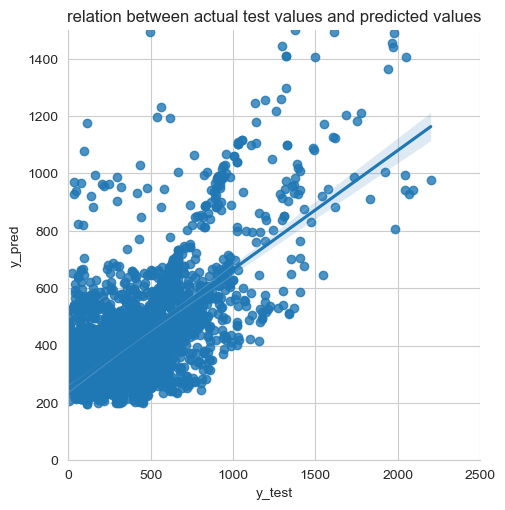

In [129]:
sns.set_style("whitegrid")
g = sns.lmplot(x="y_test", y="y_pred",data=res_df)
g = (g.set_axis_labels(x="y_test",y="y_pred").set(xlim=(0,2500),ylim=(0,1500)))
plt.title("relation between actual test values and predicted values")
plt.show(g)

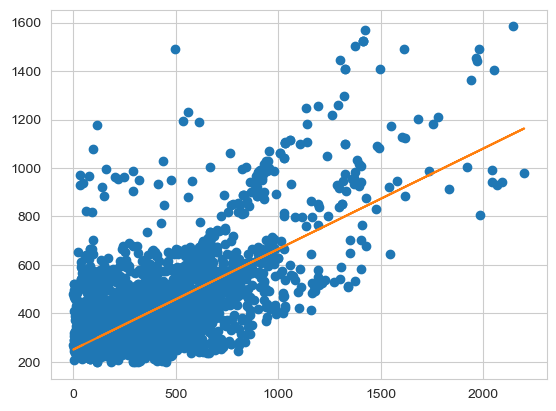

In [130]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

# model validation

In [131]:
#errors MSE, MAE, RMSE only for y_test and Y_pred
#check (Adj.) R2 for test and train
#feature importance 

# print all values together

In [132]:
#MSE test

from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)  # mean squared error

49154.11115013089

In [133]:
#rmse test

rmse = np.sqrt(mse(y_test,y_pred))  #root mean squared error
rmse

# on average we make an error of 353$

221.7072645407247

In [134]:
# MAE test

from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

152.81155609506754

In [135]:
#R2 

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.4114070011264982

In [136]:
# Adjusted R2

Adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test-X_test-1))
Adj_r2

0.41159053495838893

In [137]:
# feature importance test
#X_test_scaled = pd.DataFrame(X_test_scaled) 

feature_importances = pd.DataFrame(data={
    'Variable': X_test.columns,
    'Importance': abs(model.coef_.reshape(len(X_test_scaled.columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

!! #add names to features (lower part) and code from case study for feature importance test

feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#add name to features
important_features = feature_importances.sort_values('Importance', ascending=False).head(8)
features = numerical.columns
important_features['name'] = features[important_features['Variable']]
important_features

In [ ]:
# visualise feature importance
plt.bar(x=feature_importances['Variable'].iloc[:10], height=feature_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.show()

# model iteration, add categorical variables

In [138]:
#OneHotEncoding and OrdinalEncoding
categorical = ma_df.select_dtypes(include=object)
categorical.dropna(inplace=True)
ord_encoded = categorical[['education','month','vehicle_size']]
ord_encoded = ord_encoded.replace({
    'education':
        {'high school or below': 1, 'college': 2, 'bachelor': 3, 'master': 4, 'doctor': 5},
    'month': {'jan': 1, 'feb': 2},
    'vehicle_size': {'small': 1, 'medsize': 2, 'large': 3}
})
hot_encoded = categorical.drop(['education','month','vehicle_size','effective_to_date'], axis=1)
hot_encoded = pd.get_dummies(hot_encoded, drop_first=True, dtype=int)
cat_encoded = pd.concat([ord_encoded,hot_encoded], axis=1)
numcat = pd.concat([numericals,cat_encoded], axis=1)
numcat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,48029,61,7,52,0,9,292,2,2,2,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2228,92260,64,3,26,0,1,744,2,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,14947,22139,100,34,31,0,2,480,3,2,2,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,22332,49078,97,10,3,0,2,484,2,1,2,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,9025,23675,117,33,31,0,7,707,3,1,2,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,3,1,2,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
10685,5259,61146,65,7,68,0,6,273,2,1,2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
10686,23893,39837,201,11,63,0,2,381,3,2,2,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
10687,11971,64195,158,0,27,4,6,618,2,2,2,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [139]:
#x-y split
X = numcat.drop('total_claim_amount', axis=1)
y = numcat.total_claim_amount

In [140]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
4356,12556,31122,70,34,10,0,2,1,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6723,5254,34476,67,23,49,1,3,3,2,2,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
515,12883,77469,109,2,98,1,2,3,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.hist(figsize=(40,30), xrot = 30)

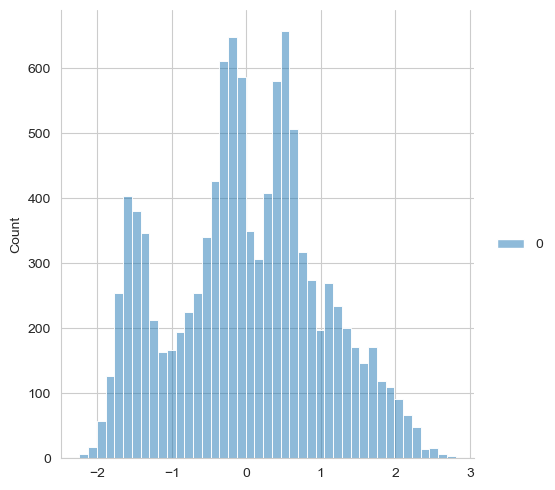

In [141]:
# Standardise - only one certain variables? 
#Standard Scaler possible too

#check one variable vs all variables! do it across whole dataframe

# check powertransformer for variable y as well
#pt = PowerTransformer()
#y_pt = pt.fit(np.array(y)).reshape(-1,1)


pt = PowerTransformer()
customer_lifetime_transformed= pt.fit_transform(numcat['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_transformed)

#scaler.fit(np.array(X_test)).reshape

In [142]:
pt.fit(np.array(X_train))
X_train_scaled = pt.transform(np.array(X_train))

X_test_scaled = pt.transform(np.array(X_test))

#column transformer - why? not necessary
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop', verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train))
X_test_ct = pd.DataFrame(ct.transform(X_test))

X_train_ct = pd.DataFrame(X_train_ct)
X_test_ct

In [146]:
# regression with stat model (alternative to sklearn), shows nice summary
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled) # adding a constant

model_x = sm.OLS(y_train, X_train_scaled).fit()
predictions_train = model.predict(X_train_scaled)

X_test_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model_x.predict(X_test_scaled)
print_model = model_x.summary()
print_model

ValueError: X has 47 features, but LinearRegression is expecting 6 features as input.

In [ ]:
feature_importances = pd.DataFrame(data={
    'Variable': X_test.columns,
    'Importance': abs(model.coef_.reshape(len(X_test_scaled.columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

In [88]:
# Evaluation
residuals = y_test - predictions_test

result=pd.DataFrame({"y_test": y_test,"y_pred": predictions_test,"residuals": residuals})
result

,y_test,y_pred,residuals
4363,137,240.695659,-103.695659
8602,191,190.732381,0.267619
10160,576,598.400963,-22.400963
9686,312,340.958088,-28.958088
757,400,434.861546,-34.861546
...,...,...,...
2647,488,445.039848,42.960152
99,1778,1281.493911,496.506089
6485,465,571.565482,-106.565482
7519,37,181.387497,-144.387497


## Error Metrics

In [ ]:
rmse_test = np.sqrt(mse(y_test,predictions_test))  #root mean squared error
print('rmse_test:', rmse_test)

rmse_train = np.sqrt(mse(y_train,predictions_train))
print('rmse_train:',rmse_train)



In [ ]:
from sklearn.linear_model import LinearRegression

R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#works with type of regression from part in numerics

# part for comparing regression models

In [117]:
#OLS Regression
# regression with stat model (alternative to sklearn), shows nice summary
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled) # adding a constant

model_x = sm.OLS(y_train, X_train_scaled).fit()
predictions_train = model_x.predict(X_train_scaled)

X_test_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model_x.predict(X_test_scaled)
print_model = model_x.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     493.5
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:45:40   Log-Likelihood:                -47951.
No. Observations:                7482   AIC:                         9.599e+04
Df Residuals:                    7437   BIC:                         9.630e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.1406      1.704    254.227      0.000     429.801     436.480
x1             4.8311      2.303      2.098      0.036       0.317       9.345
x2            -4.8581      2.021     -2.403      0.016      -8.821      -0.895
x3            87.7269      4.280     20.498      0.000      79.337      96.117
x4             5.1154      1.712      2.988      0.003       1.760       8.471
x5             0.3218      1.725      0.187      0.852      -3.060       3.704
x6            -2.8333      1.717     -1.650      0.099      -6.199       0.532
x7            -2.9938      2.036     -1.470      0.142      -6.986       0.998
x8            -4.0653      1.745     -2.330      0.020      -7.486      -0.645
x9             1.0156      1.711      0.593      0.553      -2.339       4.371
x10           -1.8227      1.732     -1.052      0.293      -5.218       1.573
x11            1.3951      1.865      0.748      0.454      -2.261       5.051
x12            0.5696      2.038      0.280      0.780      -3.425       4.564
x13            2.6550      2.054      1.293      0.196      -1.372       6.682
x14           -6.3790      1.845     -3.458      0.001      -9.995      -2.763
x15            5.4077      2.474      2.186      0.029       0.559      10.257
x16           28.3090      2.535     11.169      0.000      23.340      33.278
x17           -4.5640      4.285     -1.065      0.287     -12.964       3.836
x18            2.4816      2.312      1.074      0.283      -2.050       7.013
x19           -2.3686      2.166     -1.094      0.274      -6.614       1.877
x20           33.2999      4.089      8.143      0.000      25.284      41.316
x21            7.2210      1.725      4.186      0.000       3.839      10.603
x22          188.5433      2.382     79.160      0.000     183.874     193.212
x23           86.3530      2.140     40.345      0.000      82.157      90.549
x24           -1.5625      2.513     -0.622      0.534      -6.488       3.363
x25           30.2151      2.595     11.644      0.000      25.129      35.302
x26           -2.1983      2.771     -0.793      0.428      -7.630       3.233
x27            0.0538      1.191      0.045      0.964      -2.281       2.388
x28           -1.7154      2.643     -0.649      0.516      -6.896       3.465
x29           -2.6090      3.082     -0.846      0.397      -8.651       3.433
x30            1.8879      1.592      1.186      0.236      -1.232       5.008
x31           -1.6188      1.549     -1.045      0.296      -4.655       1.418
x32           -1.9088      1.518     -1.257      0.209      -4.885       1.068
x33            3.0395      1.618      1.878      0.060      -0.133       6.212
x34           -2.5918      1.508     -1.718      0.086      -5.549       0.365
x35            0.5789      1.500      0.386      0.700      -2.362       3.520
x3

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0)

model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

Lasso: Train -> 0.7448953008985337, Test -> 0.7332414966248039


#r2 is supposed to be smaller for test-set after the ridge or lasso method, because we want to generalise the model!

In [96]:
model=Ridge(alpha=0)
model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")


Ridge: Train -> 0.7440505462221086, Test -> 0.731265040646701


# Recursive Feature Elimination (Wrapper method)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

,coverage_extended,coverage_premium,employment_status_unemployed,location_code_suburban,location_code_urban,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
0,0,0,1,1,0,0,0,0
1,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
8546,1,0,0,0,0,0,0,0
8547,1,0,0,0,0,0,0,0
8548,0,0,0,1,0,0,0,0
8549,0,0,0,0,1,0,0,1


# Dropping Insignificant Features using p-value thresholding

In [100]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [118]:
alpha                = 0.05 # significance threshold
sig_param_names      = model_x.params[list(np.where(model_x.pvalues < alpha)[0])].iloc[0:].index.tolist() # list of names of signficant parameters
significant_features = X_added_constant[sig_param_names] # only select vars having p-value < 0.05
significant_features # print out the significant feature values

KeyError: "['x1', 'x2', 'x3', 'x4', 'x8', 'x14', 'x15', 'x16', 'x20', 'x21', 'x22', 'x23', 'x25', 'x36', 'x38', 'x42', 'x43', 'x44', 'x45'] not in index"